### Import Data

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/Satria Data pt 2/Semifinal/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
result_df = pd.read_pickle('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/result_df_clean.pkl')
result_df.head()

,content,real_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
0,,@X3PdsT0s+nosDiSVDq3nQPNxLKQV1ZMBl5NDSXLLnOs= ...,2024-01-31 17:26:28+00:00,@be9+Qm5EsBY7VLxMEGgBlOYaT0KrMsiQQLzN5iG2hOY=,reply,36,696.150781,1543.289555,14114.732016,-,1.757412,id,9411,-
1,!,@9ZwcLHT18/fgudsdN9vmg9J97LmX6RgmUQ41zZwq484= ...,2024-01-29 16:57:00+00:00,@JVWxyA2fM/S2B0bN/n/buYbHxNqUC91UUX6ShBzub+I=,reply,0,327.000000,208.666667,11230.333333,-,0.000000,id,3,-
2,! deretan pesohor dan selebriti yang dukung ga...,! Deretan Pesohor dan Selebriti yang Dukung Ga...,2024-01-30 02:03:42+00:00,@7jB3OiFFcymo1DxD4GO8wR2tuWnQLk+nRHfZmLs1iHo=,mention,0,28.000000,2.000000,75.000000,Indonesia,0.000000,id,1,-
3,!! iya pakk salah strategii next nya di perbai...,@04DvPx8s7LBc4cxDKmtXMRGxzcWjux55XJYA4DJpUOQ= ...,2024-01-07 15:57:19+00:00,@CDJsmOeil3IHVzBWFKLBs21n0Q2nBvRird0Wb9yxync=,reply,0,2.000000,2.000000,234.000000,-,0.000000,id,1,-
4,!! katanya sudah dikembalikan oleh !!,@YKXM72NPxrEQof3YA3UvtB1N7433ER/5HCHcbEdjJi8= ...,2024-01-19 04:19:17+00:00,@X4DJ8WnurWZZIm9IizCEzcdSPvFwGF1pnHnLk1YMgWk=,reply,0,1347.000000,1390.000000,60962.000000,-,0.000000,id,1,-


In [ ]:
result_df['tcode'].value_counts()

tcode
mention    1002090
reply       957233
rt          201876
Name: count, dtype: int64

In [ ]:
# import pickle
# import tensorflow as tf
# import numpy as np

# with open('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Predictons/pred_indotweet.pkl', 'rb') as f:
#     predictions = pickle.load(f)

# with open('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Predictons/pred_xgb.pkl', 'rb') as f:
#     pred_xgb = pickle.load(f)


# prob_pred = tf.nn.softmax(predictions.logits, axis=-1).numpy()
# predicted_classes = np.argmax(prob_pred, axis=-1)
# predicted_probabilities = np.max(prob_pred, axis=-1)


# result_df['pred_buz_xgb'] = pred_xgb
# result_df['pred_buz_indotweet'] = predicted_classes

# buzz_df = result_df.loc[(result_df['pred_buz_xgb'] == 1) & (result_df['pred_buz_indotweet'] == 1)]
# buzz_df.sample(1000, random_state=42)

### Create Data Label Based Hashtags

##### Anies

In [ ]:
term_anies = ['anies', 'muhaimin', 'paslon1']

pattern_anies = '|'.join(term_anies)

result_df_anies = result_df.loc[result_df['content'].str.contains(pattern_anies, case=False, na=False)]

In [ ]:
hashtag_anies = pd.read_excel('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset_Part2/keyterms_paslon/hashtag_paslon1.xlsx')

hashtag_anies = hashtag_anies[:200]
hashtag_anies['Label'] = hashtag_anies['Label'].fillna(0)
hashtag_anies

,Unnamed: 0,hashtag,count,Label
0,0,#AMINAjaDulu,398879,0.0
1,1,#AniesMuhaimin2024,134312,0.0
2,2,#DesakAnies,85963,0.0
3,3,#HaveAniesDay,70925,0.0
4,4,#PahitManiesAlwaysWithAnies,70448,0.0
...,...,...,...,...
195,195,#AnieMuhaimin2024,139,0.0
196,196,#Anies2ndstage,134,0.0
197,197,#AminMenangJudolHilang,132,0.0
198,198,#AMINSATUkanIndonesia,129,0.0


In [ ]:
hashtag_anies['Label'].value_counts()

Label
0.0    186
2.0     10
1.0      4
Name: count, dtype: int64

######Positif

In [ ]:
hashtag_anies_positif_df = hashtag_anies.loc[hashtag_anies['Label'] == 0]

hashtag_anies_positif = hashtag_anies_positif_df['hashtag'].tolist()

pattern_hashtag_anies_positif = '|'.join(hashtag_anies_positif)

result_df_anies_positif = result_df_anies.loc[result_df_anies['real_content'].str.contains(pattern_hashtag_anies_positif, case=False, na=False)]

In [ ]:
result_df_anies_positif

,content,real_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
5,!!!!!!! anies rocks debat capres #anies2ndstag...,!!!!!!! ANIES ROCKS DEBAT CAPRES #Anies2ndStag...,2024-01-07 11:31:02+00:00,@mOGUBPO/S2E8bqLoy6CfvsyYeKmZhbkSiVNhA5ZJ1Ps=,mention,0,385.0,258.0,1412.0,"Nazareth, PA",0.0,id,1,-
28,""" anies - cak imin di nomor satu jangan yang l...",""" Anies - Cak Imin di nomor satu Jangan yang l...",2024-01-17 14:01:03+00:00,@onPsVKpoC+RGRvcLjnEeUryZhtqP6Ymjg1u2Q8eEQBg=,mention,1,35.0,4.0,158.0,Indonesia,0.0,id,1,-
394,""" jangan pernah rupiahkan wewenang dari rakyat...",""" Jangan pernah rupiahkan wewenang dari rakyat...",2024-01-21 11:20:34+00:00,@ZHkrvKyF+C0ulnJAZ4LH4/EIi1xSWyJI2ZHqfMuzzLM=,mention,3,17.0,2.0,113.0,-,0.0,id,1,-
395,""" jangan takut bermimpi, lokasi lahir boleh di...",""" Jangan takut bermimpi, lokasi lahir boleh di...",2024-01-16 03:15:56+00:00,@OdU3btCuI2xr7vCy6hqDD7iotAnqRggHzhZsWvnwMUA=,mention,1,26.0,19.0,529.0,-,0.0,id,1,-
421,""" kalo ada yang jelekin kita mari jogetin saja...",""" kalo ada yang jelekin kita mari jogetin saja...",2024-01-07 18:08:00+00:00,@42x1uiZsUYObO0ehUG40oVv+6HG0N+Im0MsICkltqFM=,mention,0,14.0,5.0,522.0,-,0.0,id,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161147,ø§ù ø´ø§ø¡ ø§ùùù pks menang anies presiden...,Ø§Ù Ø´Ø§Ø¡ Ø§ÙÙÙ PKS menang ANIES presiden...,2024-01-20 01:15:35+00:00,@X7BKe+4HXHQdatqGyPr/XoaXiZ1rPmcPaB+Vc1hu6TQ=,mention,0,1820.0,1144.0,5959.0,"Sungailiat, Bangka, Indonesia",0.0,id,1,-
2161170,ø³ø¨ø­ø§ù ø§ùùù ð ø§ùø­ù ø¯ ùùù â¤...,@j7otZFW2V3v7grPItj8Fc6Zwuy82ZwauT2QJBfQikyE= ...,2024-01-04 08:32:52+00:00,@rXHZYT8IchDfyfs585DY9dLuuNXiV35Pj8JyP2QxoGc=,reply,0,462.0,308.0,21331.0,-,2.0,id,1,-
2161172,øμùùùùùù° ø§ùùùùù°ûù ø±ùø¨ùùùù...,@GQoyHMrK31j0XyQJAkiYEqCZoYOEfot6CF93M3TIiqE= ...,2024-01-21 00:18:54+00:00,@G+Jb9k4C2/bBBdhvXp6f2IPgD5Lqp6W9vhs0Js88Od0=,reply,0,719.0,136.0,536.0,Semarang Jawa Tengah,0.0,id,1,-
2161174,ù ø§ø´ø§ø¡ ø§ùùù øªø¨ø§ø±ù ø§ùùù ø¨ø§ø±...,@t5pBz5V0+yawkeRbumpX3M4G3/t9Th6smWUJre6mgKc= ...,2024-01-13 08:03:53+00:00,@nYjgszum4tZfPMmAXt9AW3QRXcTDQTf2K6CGCsh3wx8=,reply,0,73.0,64.0,980.0,-,0.0,id,1,-


In [ ]:
# result_df_anies_positif.to_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/sentiment_hashtag/result_df_anies_positif.csv', index=False)

######Negatif

In [ ]:
hashtag_anies_negatif_df = hashtag_anies.loc[hashtag_anies['Label'] == 2]

hashtag_anies_negatif = hashtag_anies_negatif_df['hashtag'].tolist()

pattern_hashtag_anies_negatif = '|'.join(hashtag_anies_negatif)

result_df_anies_negatif = result_df_anies.loc[result_df_anies['real_content'].str.contains(pattern_hashtag_anies_negatif, case=False, na=False)]

In [ ]:
result_df_anies_negatif

,content,real_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
2080,"""belum selesai"" berarti sudah terlaksana kan, ...",@qxgTnmSaJHWUdKR5XZyITojd8Iep28jrMokRhHuQXcQ= ...,2024-01-01 12:37:15+00:00,@gTUkT217xrfN8bGd36nnYT2pxTcD1VcwHuNbFgjnwVY=,reply,0,14.0,0.0,146.0,-,0.0,id,1,-
5416,"""kan katanya, bukan faktanya"" âï¸ ujar mulu...","""KAN KATANYA, BUKAN FAKTANYA"" âï¸ ujar Mulu...",2024-01-10 15:59:53+00:00,@HzgVoXpEmn4BER5bcYz3ZkFwjOCrC21+Ye3nvT6ztxU=,mention,0,6.0,1.0,82.0,-,0.0,id,1,-
7861,"""pak anies"" #terorispilih4nies ""sus rini""daste...","""Pak Anies"" #TerorisPilih4nies ""Sus Rini""Daste...",2024-01-17 09:14:25+00:00,@641SbV4G26nUwae5+8kg2Dlo0xtqwoxayRxB9e4+EpQ=,mention,0,3384.0,3082.0,21164.0,Mo tau aja,0.0,id,1,-
12873,#4niesj4njim4nis jadi pak anies tuâ¦ difitnah...,#4niesJ4njiM4nis Jadi Pak Anies tuâ¦ difitnah...,2024-01-06 13:23:04+00:00,@oX2555pZLRk9Cblj6WHPBemkOHPbJtSS8dd26LSzw3U=,mention,0,40.0,1.0,175.0,-,2.0,id,1,-
13343,#aniesjanjim4nis modal4nies janjipalsu anies i...,#AniesJanjiM4nis Modal4nies JanjiPalsu anies i...,2024-01-04 07:47:49+00:00,@SDouzZMtoXO8woxrMsUHzSXabixpZNsjLNP0Yrho9JQ=,mention,0,44.0,10396.0,1088.0,"DKI Jakarta, Indonesia",1.0,id,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042754,yups anies baswedan emang ya mulut manis anies...,Yups Anies Baswedan Emang ya Mulut Manis Anies...,2024-01-13 15:25:04+00:00,@oy0Q1lxx4fNezn/XiQ5ridbAIBKOsZCjETwm1riMVnQ=,mention,0,4.0,0.0,112.0,-,0.0,id,1,-
2042859,yupssss jadi gimana pak anies air nya akan dim...,Yupssss Jadi gimana pak Anies air nya akan dim...,2024-01-12 08:34:28+00:00,@0LjpWhf5BcVxhwJCcdXsYh0/0kDJUHD8DmyrUZAt3Pg=,mention,0,4.0,0.0,105.0,-,0.0,id,1,-
2044108,âanies dan cak imin kayak iklan pop mi insta...,âAnies dan Cak Imin kayak iklan pop mi insta...,2024-01-02 12:59:55+00:00,@udvYy3Oq4UvTtYVZtzqn4U5OXmahz0ZJvhzsup3iTKA=,mention,0,25.0,29.0,280.0,Parepare,0.0,id,1,-
2112219,ð®âð¨waduh bagaimana ini pak janji gaji ...,ð®âð¨Waduh bagaimana ini Pak janji gaji ...,2024-01-10 08:03:28+00:00,@TuqvTep7ODedpGvQnaY3lYI3PWptx8bjB/rPNVL2xm0=,mention,0,4.0,0.0,100.0,-,0.0,id,1,-


In [ ]:
# result_df_anies_negatif.to_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/sentiment_hashtag/result_df_anies_negatif.csv', index=False)

##### Prabowo

In [ ]:
term_prabowo = ['prabowo', 'gibran', 'paslon2']

pattern_prabowo = '|'.join(term_prabowo)

result_df_prabowo = result_df.loc[result_df['content'].str.contains(pattern_prabowo, case=False, na=False)]

In [ ]:
hashtag_prabowo = pd.read_excel('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset_Part2/keyterms_paslon/hashtag_paslon2.xlsx')

hashtag_prabowo = hashtag_prabowo[:200]
hashtag_prabowo['Label'] = hashtag_prabowo['Label'].fillna(0)
hashtag_prabowo

,Unnamed: 0,hashtag,count,Label
0,0,#AsalBukanPrabowo,80054,2.0
1,1,#PrabowoGemoy,45601,0.0
2,2,#prabowo,37024,0.0
3,3,#JabarTetapPakBowo,29999,0.0
4,4,#BersamaPrabowoGibran,24607,0.0
...,...,...,...,...
195,195,#PrabowoGibran4Change,96,0.0
196,196,#AslinyaHanyaPrabowo,96,0.0
197,197,#Ganjarsikatkorupsi,96,1.0
198,198,#prabowopedia,95,0.0


In [ ]:
hashtag_prabowo['Label'].value_counts()

Label
0.0    146
2.0     40
1.0     14
Name: count, dtype: int64

######Positif

In [ ]:
hashtag_prabowo_positif_df = hashtag_prabowo.loc[hashtag_prabowo['Label'] == 0]

hashtag_prabowo_positif = hashtag_prabowo_positif_df['hashtag'].tolist()

pattern_hashtag_prabowo_positif = '|'.join(hashtag_prabowo_positif)

result_df_prabowo_positif = result_df_prabowo.loc[result_df_prabowo['real_content'].str.contains(pattern_hashtag_prabowo_positif, case=False, na=False)]

In [ ]:
result_df_prabowo_positif

,content,real_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
387,""" ini adalah salah satu inovasi anak muda yang...","""https://t.co/EWZMwPJu5q ini adalah salah satu...",2024-01-03 07:58:58+00:00,@7ER5Ny6QJpzzda1H4Ogt6SwdTA9a68Y6HJAwFCwauog=,reply,0,62.666667,103.666667,41065.0,-,0.0,id,3,-
388,""" ini adalah salah satu inovasi anak muda yang...","""https://t.co/4ow5wl3kVr ini adalah salah satu...",2024-01-03 03:53:01+00:00,@jI+RRxaoOblYtt2nAOKD7zhnbi6EGPByOlNm4bc8XYA=,reply,0,85.800000,46.600000,41676.8,-,0.0,id,5,-
421,""" kalo ada yang jelekin kita mari jogetin saja...",""" kalo ada yang jelekin kita mari jogetin saja...",2024-01-07 18:08:00+00:00,@42x1uiZsUYObO0ehUG40oVv+6HG0N+Im0MsICkltqFM=,mention,0,14.000000,5.000000,522.0,-,0.0,id,1,-
618,""" kita kagum dg eropa, tapi eropa tak cinta ki...",""" Kita kagum dg eropa, tapi eropa tak cinta ki...",2024-01-10 04:45:26+00:00,@2jdWgrb33A82J0/2kZAFhT8UY5aCMqOtWEx/w4jMeL4=,reply,0,19.000000,16571.000000,730.0,-,1.0,id,1,-
782,""" santri muda indonesia raya prabowo gibran"" p...",""" Santri Muda Indonesia Raya Prabowo Gibran"" P...",2024-01-29 16:08:07+00:00,@Cx2GXaHxpaCqRO+kl5Nq6EU9Flh2z1XbQbaQspnZao8=,mention,1,3346.000000,3347.000000,27491.0,akun dikelola 8 admin,7.0,id,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159878,ð«¡âï¸ð #prabowogibran2024menang #prabo...,@35k9Cwdy2H3ExQS7P8YYXXf8cYLpvfXx3qgA7jteUAY= ...,2024-01-19 12:01:12+00:00,@BOhrRaXyNE8y1Iqm/ufl84qMLD02wOOGQsHiyfUQSR0=,mention,0,0.000000,10.000000,106.0,-,0.0,id,1,-
2161128,ø§ø°ø§ ùù øªø³øªø­ù ùø§ø³ùø¹ ù ø§ ø´ø¦øª.....,Ø§Ø°Ø§ ÙÙ ØªØ³ØªØ­Ù ÙØ§Ø³ÙØ¹ Ù Ø§ Ø´Ø¦Øª.....,2024-01-24 08:08:19+00:00,@fNssP9/WX7yUVNLbW+0ahBpYAn4y3zHkYUvOxeX19sk=,mention,0,1103.000000,234.000000,47210.0,"Pemalang, Indonesia",1.0,id,1,-
2161132,ø§ùø³ùø§ù ø¹ùûú©ù ùø±ø­ù øªû ø§ùùû ù...,Ø§ÙØ³ÙØ§Ù Ø¹ÙÛÚ©Ù ÙØ±Ø­Ù ØªÛ Ø§ÙÙÛ Ù...,2024-01-09 21:52:53+00:00,@Qy0QcKG9QvVVzHoHEdghKHz5/R8zmz5ogOX1fDOftk8=,mention,0,3910.000000,2940.000000,14649.0,PakistÃ¡n,1.0,id,1,-
2161153,ø¨ø§ùøªùùùù el gemoy #prabowogibran2024,@e8KzkiICzMkm63mubbiWwfFF55yaekwXskEQF2FW+5E= ...,2024-01-29 14:38:28+00:00,@yz+AokiO3h2VoOtEC3k3sY5+hDYbzbpE4V/wpRlrGMA=,reply,0,1171.000000,176.000000,8842.0,West Java,0.0,id,1,-


In [ ]:
# result_df_prabowo_positif.to_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/sentiment_hashtag/result_df_prabowo_positif.csv', index=False)

######Negatif

In [ ]:
hashtag_prabowo_negatif_df = hashtag_prabowo.loc[hashtag_prabowo['Label'] == 2]

hashtag_prabowo_negatif = hashtag_prabowo_negatif_df['hashtag'].tolist()

pattern_hashtag_prabowo_negatif = '|'.join(hashtag_prabowo_negatif)

result_df_prabowo_negatif = result_df_prabowo.loc[result_df_prabowo['real_content'].str.contains(pattern_hashtag_prabowo_negatif, case=False, na=False)]

In [ ]:
result_df_prabowo_negatif

,content,real_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
921,"""...musuh demokrasi! #janganpilihprabowogibran",@0W+7uAntlBogzFgw0k+r/bBhRJgO9vq6uPftAK9hdsU= ...,2024-01-02 10:16:57+00:00,@wahwoihEpy0vn1cVtLnfgJcsGqi+8XOvXQThArRHnXs=,reply,0,1235.0,1346.0,1754.0,-,0.0,id,1,-
1038,"""ada 1 anak muda bisa menjadi cawapres tapi ad...","""Ada 1 anak muda bisa menjadi cawapres tapi ad...",2024-01-02 10:03:15+00:00,@ZR7Zj/+nYsL/kPjFG+h62bZv7UiJrQgvhs18tIzZUAA=,mention,17,396.0,4294.0,7555.0,-,4.0,id,1,-
1041,"""ada apa dengan para pendukung prabowo-gibran ...","""Ada apa dengan para pendukung Prabowo-Gibran ...",2024-01-02 08:56:44+00:00,@boSk22cKSXGSAnI3EzL8UzZBENr6XYvs8OYDJPNlzls=,mention,44,17167.0,29327.0,468437.0,Selo Kartiko,1.0,id,1,-
1174,"""aku demokrat, aku anies"" #asalbukanprabowo #a...","""Aku Demokrat, Aku Anies"" #AsalBukanPrabowo #A...",2024-01-01 14:15:14+00:00,@5CbBWKq39LQORFYXDpm9QMopPTk1xJy+hTV+Hdsuklk=,mention,13,1222.0,1296.0,1717.0,-,0.0,id,1,-
1197,"""aku suka, aku suka makan burger king."" (capre...","""Aku suka, aku suka makan Burger King."" (Capre...",2024-01-13 03:00:30+00:00,@5qP4OAmxST7ZpIZdiv71tfz6tZ5G+8De8hrNv5gyzn4=,mention,0,391.0,4343.0,8101.0,-,4.0,id,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128671,ð¤­ pak... kok sering kunjungan ke jateng sek...,@78vOuTjXAJREvWUdWSvKksENGn8sAHsTp4biTMiub50= ...,2024-01-02 13:28:05+00:00,@k4D5ecP39Qc0i9OnbWM7xYZiTJ2Gm5d3HkHfFzMi6ww=,reply,0,74.0,40.0,2000.0,Nusantara,0.0,id,1,-
2128745,"ð¤­ð¤­ terus maksud lo, gua milih prabowo gi...",@CZ2QqkkVA51g07rfiXZ2xXb4OdDZ8f2w/tX68gKtI6k= ...,2024-01-05 06:31:50+00:00,@8pApHJ0NcTsPOV5Q8zhVKlzFkST0g+A7l9ki7P+WGqE=,reply,0,147.0,75.0,1372.0,Jakarta Capital Region,0.0,id,1,-
2128897,ð¤®ð¤®ð¤® jangan pernah memilih pemimpin ya...,@Yc5W5Nfw8tl0u5rAhdQO5oBA4tVDw2KPrv6ZQiUYeJE= ...,2024-01-09 08:24:36+00:00,@4yLi2BnDFZ03jXHAN+UB5jIqehPEffgYIUZjc9l0Wdw=,reply,0,469.0,236.0,10470.0,jakarta,1.0,id,1,-
2129276,ð¤² mari berkomitmen pada pertahanan negeri. ...,@QpkDfng4AqfDx7eCFK7DZzyMEYSw10JpbgTapEfQyy0= ...,2024-01-16 15:08:35+00:00,@AqA78D72DNA7QJEs6COt94dkKYg1m88dN8arRu3q9Fc=,reply,0,13.0,6.0,251.0,Semarang,0.0,id,1,-


In [ ]:
# result_df_prabowo_negatif.to_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/sentiment_hashtag/result_df_prabowo_negatif.csv', index=False)

##### Ganjar

In [ ]:
term_ganjar = ['ganjar', 'mahfud', 'paslon3']

pattern_ganjar = '|'.join(term_ganjar)

result_df_ganjar = result_df.loc[result_df['content'].str.contains(pattern_ganjar, case=False, na=False)]

In [ ]:
hashtag_ganjar = pd.read_excel('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset_Part2/keyterms_paslon/hashtag_paslon3.xlsx')

hashtag_ganjar = hashtag_ganjar[:200]
hashtag_ganjar['Label'] = hashtag_ganjar['Label'].fillna(0)
hashtag_ganjar

,Unnamed: 0,hashtag,count,Label
0,0,#GanjarMahfudRebound,860268,0.0
1,1,#GanjarPranowoPilihanUmat,814906,0.0
2,2,#GanjarMahfud2024,548682,0.0
3,3,#DuluJokowiSekarangGanjar,167675,0.0
4,4,#GanjarMahfudM3nangDebat,158257,0.0
...,...,...,...,...
195,195,#PetaniMajuBersamaGanjar,177,0.0
196,196,#ganjarin_aja,177,0.0
197,197,#GanjarForRakyat,176,0.0
198,198,#SuaraGanjarSukses,176,0.0


In [ ]:
hashtag_ganjar['Label'].value_counts()

Label
0.0    197
1.0      2
2.0      1
Name: count, dtype: int64

######Positif

In [ ]:
hashtag_ganjar_positif_df = hashtag_ganjar.loc[hashtag_ganjar['Label'] == 0]

hashtag_ganjar_positif = hashtag_ganjar_positif_df['hashtag'].tolist()

pattern_hashtag_ganjar_positif = '|'.join(hashtag_ganjar_positif)

result_df_ganjar_positif = result_df_ganjar.loc[result_df_ganjar['real_content'].str.contains(pattern_hashtag_ganjar_positif, case=False, na=False)]

In [ ]:
result_df_ganjar_positif

,content,real_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
2,! deretan pesohor dan selebriti yang dukung ga...,! Deretan Pesohor dan Selebriti yang Dukung Ga...,2024-01-30 02:03:42+00:00,@7jB3OiFFcymo1DxD4GO8wR2tuWnQLk+nRHfZmLs1iHo=,mention,0,28.0,2.0,75.0,Indonesia,0.0,id,1,-
9,""" _bungherwin poltracking prabowo ganjar prano...",""" _BungHerwin poltracking prabowo Ganjar Prano...",2024-01-01 08:12:17+00:00,@jjPRyeexxyS4l02gYwOhNm9ippZ/X0XaTgiUcogTylA=,mention,0,0.0,0.0,262.0,-,0.0,id,1,-
10,""" _bungherwin poltracking prabowo ganjar prano...",""" _BungHerwin poltracking prabowo Ganjar Prano...",2024-01-01 13:17:50+00:00,@DI63jKmbFuP4s7t44sWgYSwUiumJ58pYJ6rt7qvL57o=,mention,0,9.0,0.0,385.0,-,0.0,id,1,-
12,""" achmadrzein_ ch_chotimah2 ganjar pranowo itu...",""" AchmadRZein_ ch_chotimah2 Ganjar Pranowo Itu...",2024-01-04 03:13:07+00:00,@qup3CBJsNXpoDkoInXFXmMtauvjHEs3TaPpryWALtAc=,mention,0,31.0,1.0,378.0,-,0.0,id,1,-
17,""" adityaseptianr6 stefanantonio__ siticeriasel...",""" AdityaSeptianR6 StefanAntonio__ siticeriasel...",2024-01-01 19:34:32+00:00,@XtORRJAwVrnDcobXf+qS/XtN7veGXNvs79t+plDBPps=,mention,0,15.0,0.0,407.0,-,0.0,id,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161104,"ð«μ â â ardiningrum22: debat capres pertama, ...","ð«µ Â Â Ardiningrum22: Debat Capres Pertama, ...",2024-01-10 02:20:45+00:00,@XxutygtwjlBevjxn7W1LZqXBQlgmyggTpm6RQK4TA50=,mention,0,12.0,1.0,575.0,-,0.0,id,1,-
2161105,"ð«μ â â faizalassegaf: debat capres , ganjar ...","ð«µ Â Â faizalassegaf: Debat Capres , Ganjar ...",2024-01-05 08:45:37+00:00,@Q3zi8q6LPaAkkiVWu8WOKY239kQq9eBaiMGV9zO1CRs=,mention,0,12.0,1.0,334.0,-,0.0,id,1,-
2161122,ø¥ø±ø§ø¯ø© ùùùø© semua dukungan rakyat indo...,@eiNnoQAyWyXZva8dP+uE5ecojkSntgAO+QLrN2iHbzo= ...,2024-01-30 10:36:08+00:00,@lXyLNp9u9mBF2cxL+/lX/ACgJGAdT3BiDPRReeHLxzo=,reply,0,722.0,619.0,2007.0,-,0.0,id,1,-
2161128,ø§ø°ø§ ùù øªø³øªø­ù ùø§ø³ùø¹ ù ø§ ø´ø¦øª.....,Ø§Ø°Ø§ ÙÙ ØªØ³ØªØ­Ù ÙØ§Ø³ÙØ¹ Ù Ø§ Ø´Ø¦Øª.....,2024-01-24 08:08:19+00:00,@fNssP9/WX7yUVNLbW+0ahBpYAn4y3zHkYUvOxeX19sk=,mention,0,1103.0,234.0,47210.0,"Pemalang, Indonesia",1.0,id,1,-


In [ ]:
# result_df_ganjar_positif.to_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/sentiment_hashtag/result_df_ganjar_positif.csv', index=False)

######Negatif

In [ ]:
hashtag_ganjar_negatif_df = hashtag_ganjar.loc[hashtag_ganjar['Label'] == 2]

hashtag_ganjar_negatif = hashtag_ganjar_negatif_df['hashtag'].tolist() + ['#ganjarblunder', '#GanjarBlunder', '#ganjargagal', '#GanjarGagal', '#UbanSokJadiJWK', '#GanjarBukanJWK', '#UbanBukanPakde', '#GanjarGakJelas', '#ganjargakjelas', '#gamausamagamud', '#bikingamud', '#ganjarbaper', '#GanjarBaper', '#ganjarantikritik', '#GanjarJKWPalsu']

pattern_hashtag_ganjar_negatif = '|'.join(hashtag_ganjar_negatif)

result_df_ganjar_negatif = result_df_ganjar.loc[result_df_ganjar['real_content'].str.contains(pattern_hashtag_ganjar_negatif, case=False, na=False)]

In [ ]:
result_df_ganjar_negatif

,content,real_content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re
30775,10 jan dan 10 prestasi anggota partai banteng!...,10 JAN DAN 10 PRESTASI ANGGOTA PARTAI BANTENG!...,2024-01-10 07:42:43+00:00,@cbGQvZJUb0dqi+OKQSMcBmecEtSTpE+H1ts6cB6jZHk=,mention,0,7.0,4.0,83.000000,-,0.0,id,1,-
31353,11ribu orang itu udah fix gasuka sama ganjar p...,11ribu orang itu udah fix gasuka sama ganjar p...,2024-01-07 07:05:06+00:00,@BA8trfBcSih4PIdSgsX0kMYcDYFiDaUv4KL8f9CjxJs=,mention,0,0.0,0.0,266.000000,-,0.0,id,1,-
38479,5 prestasi ganjar pranowo yang gak bisa dibang...,5 prestasi Ganjar pranowo yang gak bisa dibang...,2024-01-05 07:59:35+00:00,@qHb32Hp4sa1ckoHNOwHwE1Jn8zmHaNZ7oEZpwcQ3S0A=,mention,0,7.0,0.0,88.000000,-,0.0,id,1,-
46802,abis ganjar pranowo menjelekkan jokowi terbitl...,Abis Ganjar Pranowo menjelekkan jokowi terbitl...,2024-01-03 13:51:45+00:00,@AIbYuNzNcp8KXGvLMvuTauE+2IAL1ntsZkXFJo07oP0=,mention,0,21.0,1.0,81.000000,-,0.0,id,1,-
46877,abis jelekin pas tau penilaian jeblok lgsg puj...,Abis jelekin pas tau penilaian jeblok lgsg puj...,2024-01-03 09:49:40+00:00,@qZT7CRs8cs9z5u+IGtusJsTAHKP1/d+Jn6SHuILS63k=,mention,0,0.0,0.0,149.000000,-,0.0,id,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996358,wow sok2an kritik dan jelekin pak jokowi nih a...,Wow sok2an kritik Dan Jelekin Pak Jokowi nih a...,2024-01-07 10:55:58+00:00,@mFgsfcAf/qKTOqEYxGOPeTZSgRMWbnQVKikRZR6mk5w=,mention,0,7.0,1.0,5.000000,-,0.0,id,1,-
2006316,"ya mau gimana lagi dek mahasiswa, kan dia seka...","Ya mau gimana lagi dek mahasiswa, kan dia seka...",2024-01-05 07:30:09+00:00,@XjYaiQRdTNnd2N41qPztLSfIWuuQe/fgH38tuGoSz/U=,mention,0,6.0,0.0,38.000000,-,0.0,id,1,-
2013612,yakin masih mau pilih paslon yang bikin wadas ...,Yakin masih mau pilih paslon yang bikin Wadas ...,2024-01-16 13:12:20+00:00,@CcuGP+T3eDLi29GyrWnkYQhGKCzXH7Sgl/NJstcaV1I=,mention,0,7.0,6.0,98.000000,-,0.0,id,1,-
2023768,yang serang jokowi dia yang akan rugi #pdip #p...,Yang serang jokowi dia yang akan rugi #pdip #p...,2024-01-09 22:10:34+00:00,@LGGqQSqTABVs0qY79ZZg+vjOD4gr7XrQB/Zv2kD65u4=,mention,0,42.0,135.0,370.333333,-,0.0,id,3,-


In [ ]:
# result_df_ganjar_negatif.to_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/sentiment_hashtag/result_df_ganjar_negatif.csv', index=False)

### Create Data Label Based Pretrained Model

##### Anies

In [ ]:
term_anies = ['anies', 'muhaimin', 'paslon1']

pattern_anies = '|'.join(term_anies)

buzz_df_anies = buzz_df.loc[buzz_df['content'].str.contains(pattern_anies, case=False, na=False)]

In [ ]:
print(buzz_df_anies.shape)

(75924, 15)


In [ ]:
buzz_df_anies['tcode'].value_counts()

tcode
reply      50790
mention    19352
rt          5782
Name: count, dtype: int64

In [ ]:
buzz_df_anies_rt = buzz_df_anies.loc[buzz_df_anies['tcode'] == 'rt'][:2000]
buzz_df_anies_reply = buzz_df_anies.loc[buzz_df_anies['tcode'] == 'reply'][:2000]
buzz_df_anies_mention = buzz_df_anies.loc[buzz_df_anies['tcode'] == 'mention'][:2000]

buzz_df_anies_sample = pd.concat([buzz_df_anies_rt, buzz_df_anies_reply, buzz_df_anies_mention])
buzz_df_anies_sample = buzz_df_anies_sample.sample(frac=1, random_state=42).reset_index(drop=True)
buzz_df_anies_sample

,content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re,pred_buz_xgb,pred_buz_indotweet
0,rt desak anies hadir untuk menghargai para gen...,2024-01-24 05:27:57+00:00,@WFTooYVo7HCuIdnBgiNLxas5RlHaEFMnGJtnHUcQPp0=,rt,80,1651.968254,3302.777778,79339.047619,-,2.984127,id,63,Catatan_ali7,1,1
1,ahy sebaiknya diam saja. sy yakin kl pak anies...,2024-01-09 07:07:52+00:00,@O8oNLTNtIc/d/ckMyI/uzLZB95ufb3Ie/FtmIXgzwXA=,reply,0,39.000000,7.000000,1021.000000,-,0.000000,id,1,-,1,1
2,rt 5 hasil lembaga survey terbaru jelang pilpr...,2024-01-29 14:10:22+00:00,@FPHD9e77Jh7sGc8XkSc11/iBSZ2EJRLbjvHYXRHq0/U=,rt,5,161.250000,379.250000,3580.750000,-,0.000000,id,4,zputt99,1,1
3,"""dukungan merata dari sabang sampai merauke un...",2024-01-31 08:00:36+00:00,@3BZ5t9YQpLNnrxbCUu0fMyNsiQJvLOGK0rsuo5ar2pc=,reply,0,49.000000,15.000000,1175.000000,-,0.000000,id,1,-,1,1
4,alasan tidak memilih paslon: anies - menolak i...,2024-01-06 02:21:42+00:00,@AinJWfBqO2Vovxg5vXPLsR58ec5MV3+3D8vRIsYe5i8=,mention,0,202.000000,92.000000,9765.000000,Zimbabwe,0.000000,id,1,-,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,"ah ngapain yg nyapres anies kok, bebas dong gw...",2024-01-17 15:30:49+00:00,@BragVfbkZZPdySj+Lkp3KzriQjPlI4SdfuM6rq5e3nQ=,reply,0,95.000000,15.000000,4944.000000,-,0.000000,id,1,-,1,1
5996,aku mau coblos anies biar masuk surga,2024-01-28 07:06:38+00:00,@cLtRFvqJPsDSOGCHVlOnrAaeEI6uSTfBZ6RGy7HkqfU=,mention,0,5.000000,75.000000,9867.000000,"Jawa Barat, Indonesia",0.000000,id,1,-,1,1
5997,alat transportasi yg smw orang punya : motor â...,2024-01-20 11:31:14+00:00,@kl2YkJB121ZOq2g3xWA7IfNk4VpWlw9eK6OmiEvlIGc=,mention,0,83.000000,89.000000,3111.000000,-,0.000000,id,1,-,1,1
5998,anies : ngomong apa dia? ganjar : gak tau anie...,2024-01-07 16:27:00+00:00,@wTvP5BG75J3mzG3XcVvCiBCz7OvxftgNPDa6WBPrtDM=,mention,0,126.000000,61.000000,5474.000000,-,0.000000,id,1,-,1,1


In [ ]:
# buzz_df_anies_sample.to_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/buzz_df_anies_sample.csv', index=False)

##### Prabowo

In [ ]:
term_prabowo = ['prabowo', 'gibran', 'paslon2']

pattern_prabowo = '|'.join(term_prabowo)

buzz_df_prabowo = buzz_df.loc[buzz_df['content'].str.contains(pattern_prabowo, case=False, na=False)]

In [ ]:
print(buzz_df_prabowo.shape)

(109845, 15)


In [ ]:
buzz_df_prabowo['tcode'].value_counts()

tcode
reply      72940
mention    28674
rt          8231
Name: count, dtype: int64

In [ ]:
buzz_df_prabowo_rt = buzz_df_prabowo.loc[buzz_df_prabowo['tcode'] == 'rt'][:2000]
buzz_df_prabowo_reply = buzz_df_prabowo.loc[buzz_df_prabowo['tcode'] == 'reply'][:2000]
buzz_df_prabowo_mention = buzz_df_prabowo.loc[buzz_df_prabowo['tcode'] == 'mention'][:2000]

buzz_df_prabowo_sample = pd.concat([buzz_df_prabowo_rt, buzz_df_prabowo_reply, buzz_df_prabowo_mention])
buzz_df_prabowo_sample = buzz_df_prabowo_sample.sample(frac=1, random_state=42).reset_index(drop=True)
buzz_df_prabowo_sample

,content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re,pred_buz_xgb,pred_buz_indotweet
0,rt elektabilitas paslon 02 lebih dari 50 perse...,2024-01-31 06:19:47+00:00,@m2voMcx/feEEmc0xiYH/6QdmLSOXYIfk4AprL/RQcMk=,rt,2,134.0,70.0,1086.0,-,0.0,id,1,m_sari6520,1,1
1,"""masa yang begituan ditanyain. kan udah jelas....",2024-01-05 08:07:58+00:00,@n8a93rHGzoP2nol0u7orSZeAZ3G3bvcxOUt7QFt/XDU=,reply,0,85.8,46.0,42266.8,-,0.0,id,5,-,1,1
2,rt 7 potret ari lasso dapat kue ultah super be...,2024-01-18 13:36:19+00:00,@Hpil1lH0egpq4zgZ+yqgcd5BN3imewwtXKXeDxH1kIk=,rt,10,80.4,186.1,65985.5,-,0.3,id,10,ChairudinN6548,1,1
3,"""anak-anak zaman now perlu lebih banyak lagi d...",2024-01-22 04:47:37+00:00,@inefloXdBhB5hX8b4oCfYcSNX/8Asb7BGatb1rtpwHE=,reply,0,74.2,47.4,44639.6,-,0.0,id,5,-,1,1
4,anak fisip milih prabowo tuh aneh bgt kata gue.,2024-01-22 20:31:43+00:00,@CBSxg41Ccqd/iEi/LvrUMT9+Ba9EgMQB2ZcRzvfUYcE=,mention,0,88.0,57.0,1930.0,-,0.0,id,1,-,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,"""kita tanggapi sangat positif,"" tutupnya. #ind...",2024-01-31 10:08:54+00:00,@T3/Li4JTU6X+uc60OWgCOa87q5r4Rz/HV9p1Xkn4acU=,reply,0,100.0,37.0,37349.0,-,0.0,id,1,-,1,1
5996,all in prabowo sampe 185%,2024-01-04 08:33:43+00:00,@n5jvpmcRI2XOEbvRUaT+mDKWMYpZ6lpjyuYrRVm9aF4=,mention,0,272.0,30.0,1759.0,-,0.0,id,1,-,1,1
5997,anak hi milih prabowo peak teraneh menurut gw ...,2024-01-25 14:27:37+00:00,@uCLCd8D0KnfazXMisZ9Me0FfaQA/K8vxYS2XVnZwswI=,mention,0,143.0,54.0,2449.0,-,0.0,id,1,-,1,1
5998,anies baswedan dilaporkan ke bawaslu terkait d...,2024-01-09 04:13:06+00:00,@bOuHFJth7RzBQ5IhKFANfLwQaBHcuKCbSmKQBUnnhkU=,mention,0,1.0,52.0,618.0,Indonesia,0.0,id,1,-,1,1


In [ ]:
# buzz_df_prabowo_sample.to_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/buzz_df_prabowo_sample.csv', index=False)

##### Ganjar

In [ ]:
term_ganjar = ['ganjar', 'mahfud', 'paslon3']

pattern_ganjar = '|'.join(term_ganjar)

buzz_df_ganjar = buzz_df.loc[buzz_df['content'].str.contains(pattern_ganjar, case=False, na=False)]

In [ ]:
print(buzz_df_ganjar.shape)

(340531, 15)


In [ ]:
buzz_df_ganjar['tcode'].value_counts()

tcode
mention    303644
reply       23196
rt          13691
Name: count, dtype: int64

In [ ]:
buzz_df_ganjar_rt = buzz_df_ganjar.loc[buzz_df_ganjar['tcode'] == 'rt'][:2000]
buzz_df_ganjar_reply = buzz_df_ganjar.loc[buzz_df_ganjar['tcode'] == 'reply'][:2000]
buzz_df_ganjar_mention = buzz_df_ganjar.loc[buzz_df_ganjar['tcode'] == 'mention'][:2000]

buzz_df_ganjar_sample = pd.concat([buzz_df_ganjar_rt, buzz_df_ganjar_reply, buzz_df_ganjar_mention])
buzz_df_ganjar_sample = buzz_df_ganjar_sample.sample(frac=1, random_state=42).reset_index(drop=True)
buzz_df_ganjar_sample

,content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re,pred_buz_xgb,pred_buz_indotweet
0,"rt capres kece, ganjar pranowo mahfud md! ayo ...",2024-01-19 18:16:07+00:00,@O/KNE7rmRz8tI9eBY/tS8ybQ8iLY6kCI+iHeEA6bCUU=,rt,1,2.000000,1.000000,354.000000,-,0.000000,id,1,allford_gl53079,1,1
1,"asli parah bgt ini, kok kayak yakin menang ga ...",2024-01-29 04:15:13+00:00,@siE6Lj8zYSAZlNpLn1QLjagJuZyTLQzt7eOB60DmgYQ=,reply,0,438.000000,88.000000,3109.000000,Indonesia,1.000000,id,1,-,1,1
2,"rt ajak keluarga, teman, dan tetangga untuk be...",2024-01-19 14:29:16+00:00,@yBWLrEBsJKkK5r7tdDVHnDrPJHaWBxs8m123bbiJOUM=,rt,10,4.000000,0.000000,1591.000000,-,0.000000,id,1,PutuLuzy,1,1
3,"""tolong dengarkan baik baik. apa yang disampai...",2024-01-26 07:58:10+00:00,@QiX5sq7s+nJDKWjwq6fjiq1jytRcuj84ckz/rQpP4cU=,reply,0,54.000000,21.000000,14211.000000,Dulbedul911,0.000000,id,1,-,1,1
4,".amin dan wowo gemoysian punya wawasan, tapi g...",2024-01-21 01:55:11+00:00,@3N38w/YIQ6iIfHl9EMFrkcPMF56jtCChairPxoCcFnA=,mention,0,2.000000,9.000000,4724.000000,-,0.000000,id,1,-,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,apakah prabowo bisa tidur tadi malam habis dir...,2024-01-08 05:15:04+00:00,@WQbapxy84/c3qEdadnh5gCutr++RTMDArtzktCHbtME=,reply,0,99.000000,5.000000,974.000000,-,0.000000,id,1,-,1,1
5996,".amin dan wowo gemoysian mungkin terkenal, tap...",2024-01-26 05:00:22+00:00,@zyK7PcEmLDOLyqrssssazBvRjM+NHl98WvMsDp+Ac80=,mention,0,1.000000,9.333333,5600.333333,-,0.000000,id,3,-,1,1
5997,".amin dan wowo gemoysian punya wawasan, tapi g...",2024-01-20 23:50:13+00:00,@7ds5YBek58FSJEJzuyOkIZCv2JvZASg0YvUSLwALcn4=,mention,0,0.500000,8.000000,4275.000000,-,0.000000,id,2,-,1,1
5998,03 udahpasti #jnk #ganjarmahfudrebound #ganjar...,2024-01-26 17:05:20+00:00,@KL12L8y5SRFrJUH3JYfWswgPB9afxAHn5XHnjWcGqfs=,mention,0,0.333333,5.000000,7570.000000,-,0.000000,id,3,-,1,1


In [ ]:
# buzz_df_ganjar_sample.to_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/buzz_df_ganjar_sample.csv', index=False)

#### Inference

##### Import Test Data

In [ ]:
import pandas as pd
import random as rn
import numpy as np
import os
import tensorflow as tf

seed_value = 42

In [ ]:
buzz_df_anies_sample = pd.read_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/buzz_df_anies_sample.csv')
buzz_df_anies_sample.shape

(6000, 15)

In [ ]:
buzz_df_prabowo_sample = pd.read_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/buzz_df_prabowo_sample.csv')
buzz_df_prabowo_sample.shape

(6000, 15)

In [ ]:
buzz_df_ganjar_sample = pd.read_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/buzz_df_ganjar_sample.csv')
buzz_df_ganjar_sample.shape

(6000, 15)

##### Predict Test Data Anies

In [ ]:
words_count = buzz_df_anies_sample['content'].apply(lambda x: len(x.split()))
buzz_df_anies_sample['word_count'] = words_count

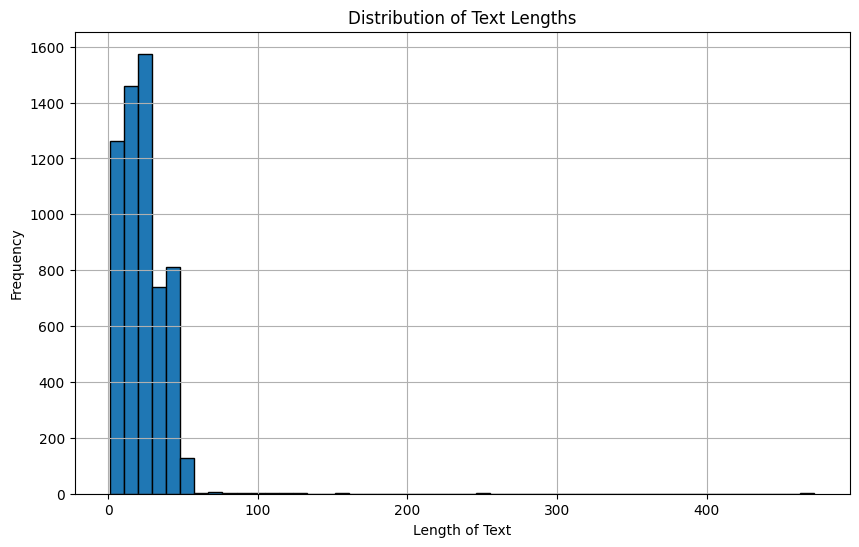

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(words_count, bins=50, edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
buzz_df_anies_sample_test = buzz_df_anies_sample.loc[buzz_df_anies_sample['word_count'] < 100]
buzz_df_anies_sample_test.shape

(5988, 16)

In [ ]:
from transformers import pipeline

pretrained_name = "ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa"

sentiment_model = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/899 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/476k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
from tqdm import tqdm

# Initialize an empty list to store predictions
predictions = []

# Set batch size for inference
batch_size = 64
test_data = buzz_df_anies_sample_test['content'].tolist()

# Use tqdm to show the progress bar
for i in tqdm(range(0, len(test_data), batch_size), desc="Inference Progress"):
    batch = test_data[i:i + batch_size]
    batch_predictions = sentiment_model(batch)
    predictions.extend(batch_predictions)

Inference Progress: 100%|██████████| 94/94 [20:25<00:00, 13.04s/it]


In [ ]:
labels = [prediction['label'] for prediction in predictions]
scores = [prediction['score'] for prediction in predictions]

test_label = pd.Series(labels)
test_label.value_counts()

buzz_df_anies_sample_test['sentiment_pred'] = labels
buzz_df_anies_sample_test['sentiment_score'] = scores

<ipython-input-13-cc54a32d66f5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buzz_df_anies_sample_test['sentiment_pred'] = labels
<ipython-input-13-cc54a32d66f5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buzz_df_anies_sample_test['sentiment_score'] = scores


In [ ]:
buzz_df_anies_sample_test[:10]

,content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re,pred_buz_xgb,pred_buz_indotweet,word_count,sentiment_pred,sentiment_score
0,rt desak anies hadir untuk menghargai para gen...,2024-01-24 05:27:57+00:00,@WFTooYVo7HCuIdnBgiNLxas5RlHaEFMnGJtnHUcQPp0=,rt,80,1651.968254,3302.777778,79339.047619,-,2.984127,id,63,Catatan_ali7,1,1,44,Positive,0.916047
1,ahy sebaiknya diam saja. sy yakin kl pak anies...,2024-01-09 07:07:52+00:00,@O8oNLTNtIc/d/ckMyI/uzLZB95ufb3Ie/FtmIXgzwXA=,reply,0,39.000000,7.000000,1021.000000,-,0.000000,id,1,-,1,1,15,Negative,0.999382
2,rt 5 hasil lembaga survey terbaru jelang pilpr...,2024-01-29 14:10:22+00:00,@FPHD9e77Jh7sGc8XkSc11/iBSZ2EJRLbjvHYXRHq0/U=,rt,5,161.250000,379.250000,3580.750000,-,0.000000,id,4,zputt99,1,1,26,Neutral,0.999112
3,"""dukungan merata dari sabang sampai merauke un...",2024-01-31 08:00:36+00:00,@3BZ5t9YQpLNnrxbCUu0fMyNsiQJvLOGK0rsuo5ar2pc=,reply,0,49.000000,15.000000,1175.000000,-,0.000000,id,1,-,1,1,9,Neutral,0.845931
4,alasan tidak memilih paslon: anies - menolak i...,2024-01-06 02:21:42+00:00,@AinJWfBqO2Vovxg5vXPLsR58ec5MV3+3D8vRIsYe5i8=,mention,0,202.000000,92.000000,9765.000000,Zimbabwe,0.000000,id,1,-,1,1,40,Neutral,0.996314
5,rt bacrit. abu janda si zionist aja ada di kub...,2024-01-30 05:02:51+00:00,@5oC4ynlEGajbtBKspZYuaCDbw+ngHdvvmXfpEApLEDw=,rt,2,14.000000,0.000000,71.000000,-,0.000000,id,1,arykunosan,1,1,49,Negative,0.999857
6,rt anies menerima 9 penghargaan nasional saat ...,2024-01-12 16:30:02+00:00,@kfT2qe8579Df3N9T03xbtqSe1lFizE5gdOAA38H5bWg=,rt,8,2649.625000,2916.750000,65100.750000,-,2.875000,id,8,bianca01403,1,1,30,Neutral,0.591141
7,rt . . pak anies .. anda membawa keadilan sosi...,2024-01-21 15:23:54+00:00,@3GGuN9usEyLp5TAet4ufrxHQCJA1nBvmdfN3CJ95vPc=,rt,231,203.000000,51.500000,945.500000,-,0.000000,id,2,StefanAntonio__,1,1,52,Negative,0.999832
8,rt cukuplah mrk menjadi saksi seorang anies ra...,2024-01-08 14:33:25+00:00,@+IW8ojJRROecki9RIfKtYz/1ruqJFg2qSnwoDE5NZJE=,rt,1,440.000000,471.000000,28633.000000,-,0.000000,id,1,tigeradvan75829,1,1,12,Neutral,0.995971
9,rt abah memulai perubahan di sistem kampanye d...,2024-01-17 03:18:36+00:00,@CJVdBJfA26mxi3pq+YGutVT3qUTt2BJsIwx7Z5E0c0Y=,rt,24,584.384615,422.038462,26910.346154,-,0.538462,id,26,Roy75361813,1,1,40,Negative,0.982094


In [ ]:
# buzz_df_anies_sample_test.to_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/buzz_df_anies_sentiment.csv', index=False)

##### Predict Test Data Prabowo

In [ ]:
words_count = buzz_df_prabowo_sample['content'].apply(lambda x: len(x.split()))
buzz_df_prabowo_sample['word_count'] = words_count

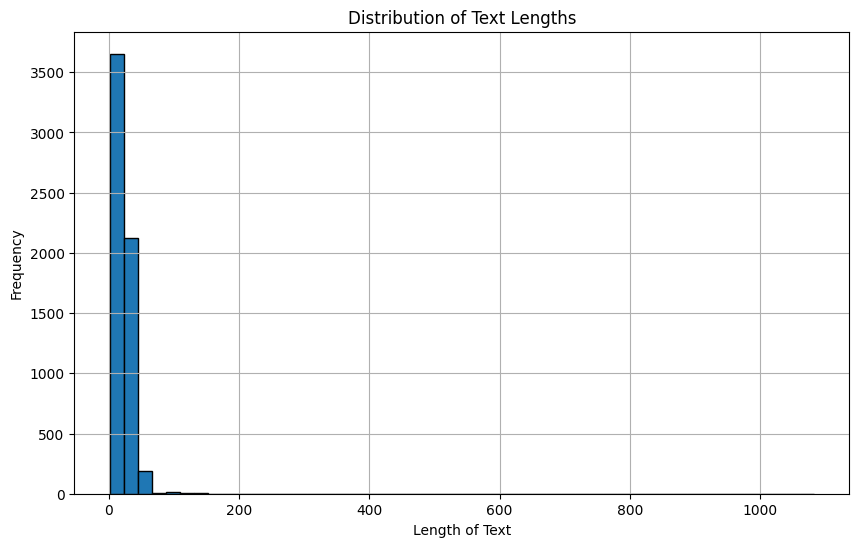

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(words_count, bins=50, edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
buzz_df_prabowo_sample_test = buzz_df_prabowo_sample.loc[buzz_df_prabowo_sample['word_count'] < 100]
buzz_df_prabowo_sample_test.shape

(5984, 16)

In [ ]:
from transformers import pipeline

pretrained_name = "ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa"

sentiment_model = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/899 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/476k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
from tqdm import tqdm

# Initialize an empty list to store predictions
predictions = []

# Set batch size for inference
batch_size = 64
test_data = buzz_df_prabowo_sample_test['content'].tolist()

# Use tqdm to show the progress bar
for i in tqdm(range(0, len(test_data), batch_size), desc="Inference Progress"):
    batch = test_data[i:i + batch_size]
    batch_predictions = sentiment_model(batch)
    predictions.extend(batch_predictions)

Inference Progress: 100%|██████████| 94/94 [15:38<00:00,  9.98s/it]


In [ ]:
labels = [prediction['label'] for prediction in predictions]
scores = [prediction['score'] for prediction in predictions]

buzz_df_prabowo_sample_test['sentiment_pred'] = labels
buzz_df_prabowo_sample_test['sentiment_score'] = scores

test_label = pd.Series(labels)
test_label.value_counts()

Neutral     3402
Negative    1465
Positive    1117
Name: count, dtype: int64

In [ ]:
buzz_df_prabowo_sample_test[:10]

,content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re,pred_buz_xgb,pred_buz_indotweet,word_count,sentiment_pred,sentiment_score
0,rt elektabilitas paslon 02 lebih dari 50 perse...,2024-01-31 06:19:47+00:00,@m2voMcx/feEEmc0xiYH/6QdmLSOXYIfk4AprL/RQcMk=,rt,2,134.000000,70.000000,1086.000000,-,0.000000,id,1,m_sari6520,1,1,19,Neutral,0.999673
1,"""masa yang begituan ditanyain. kan udah jelas....",2024-01-05 08:07:58+00:00,@n8a93rHGzoP2nol0u7orSZeAZ3G3bvcxOUt7QFt/XDU=,reply,0,85.800000,46.000000,42266.800000,-,0.000000,id,5,-,1,1,16,Neutral,0.999664
2,rt 7 potret ari lasso dapat kue ultah super be...,2024-01-18 13:36:19+00:00,@Hpil1lH0egpq4zgZ+yqgcd5BN3imewwtXKXeDxH1kIk=,rt,10,80.400000,186.100000,65985.500000,-,0.300000,id,10,ChairudinN6548,1,1,20,Neutral,0.999474
3,"""anak-anak zaman now perlu lebih banyak lagi d...",2024-01-22 04:47:37+00:00,@inefloXdBhB5hX8b4oCfYcSNX/8Asb7BGatb1rtpwHE=,reply,0,74.200000,47.400000,44639.600000,-,0.000000,id,5,-,1,1,25,Positive,0.998219
4,anak fisip milih prabowo tuh aneh bgt kata gue.,2024-01-22 20:31:43+00:00,@CBSxg41Ccqd/iEi/LvrUMT9+Ba9EgMQB2ZcRzvfUYcE=,mention,0,88.000000,57.000000,1930.000000,-,0.000000,id,1,-,1,1,9,Negative,0.999866
5,rt buku hitam prabowo subianto dibedah di mata...,2023-12-31 23:04:36+00:00,@WP4N4aKz1pW6n9fmpTmqRMuUjLqmYFgwd/OLkzj0xKg=,rt,10,80.500000,184.900000,60236.100000,-,0.300000,id,10,ChairudinN6548,1,1,14,Neutral,0.999734
6,"rt bela prabowo subianto, kiky saputri ungkap ...",2024-01-19 11:07:20+00:00,@81pFZ4mL0VmR/TcKVSi/rUwLj+i1GBDwQSGblwRfI6c=,rt,10,51.400000,20.400000,66479.800000,-,0.000000,id,10,NegarakuApa,1,1,28,Neutral,0.999583
7,rt 2 pesan prabowo di hari pahlawan nasional 2...,2024-01-23 00:31:07+00:00,@7bstu5VuoyfSHK4aYPXj59u+Ukb50Igr8P3V2TwN3V4=,rt,9,86.666667,206.666667,69588.444444,-,0.333333,id,9,ChairudinN6548,1,1,17,Neutral,0.999634
8,rt dpat cawapres gibran adalah kutukn bagi pra...,2024-01-24 13:35:59+00:00,@/Wu19PwIn4CkBe3RZNxY8tsOEKnwVwU3PL9OI/BHvZU=,rt,1,615.000000,332.000000,13557.000000,-,0.000000,id,1,handayani_44277,1,1,10,Neutral,0.999291
9,rt ahy ajak menangkan prabowo subianto-gibran ...,2024-01-27 18:18:14+00:00,@txtQ/6FR839lBp0I2HEEtwunDXgA3PDXWxGZeeb4Rcc=,rt,9,49.750000,19.250000,72158.500000,-,0.000000,id,8,ChairudinN6548,1,1,27,Neutral,0.999662


In [ ]:
# buzz_df_prabowo_sample_test.to_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/buzz_df_prabowo_sentiment.csv', index=False)

##### Predict Test Data Ganjar

In [ ]:
words_count = buzz_df_ganjar_sample['content'].apply(lambda x: len(x.split()))
buzz_df_ganjar_sample['word_count'] = words_count

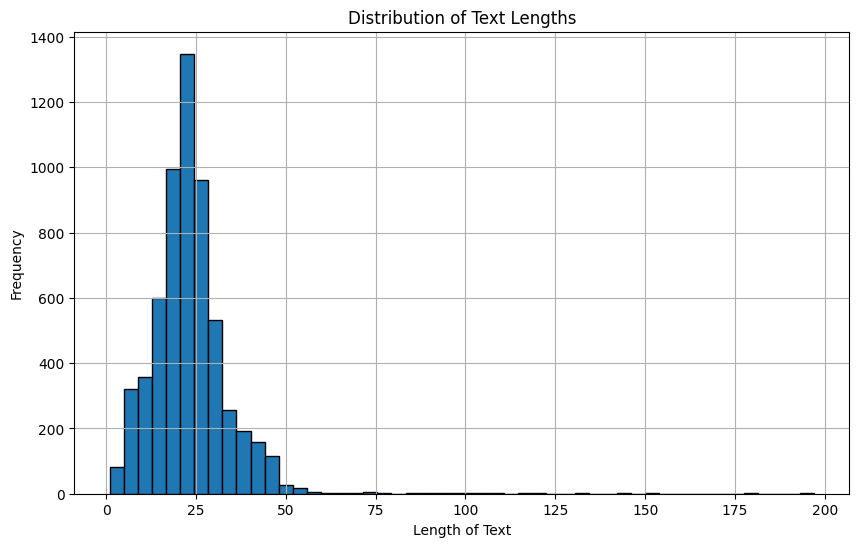

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(words_count, bins=50, edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
buzz_df_ganjar_sample_test = buzz_df_ganjar_sample.loc[buzz_df_ganjar_sample['word_count'] < 100]
buzz_df_ganjar_sample_test.shape

(5987, 16)

In [ ]:
from transformers import pipeline

pretrained_name = "ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa"

sentiment_model = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
from tqdm import tqdm

# Initialize an empty list to store predictions
predictions = []

# Set batch size for inference
batch_size = 64
test_data = buzz_df_ganjar_sample_test['content'].tolist()

# Use tqdm to show the progress bar
for i in tqdm(range(0, len(test_data), batch_size), desc="Inference Progress"):
    batch = test_data[i:i + batch_size]
    batch_predictions = sentiment_model(batch)
    predictions.extend(batch_predictions)

Inference Progress: 100%|██████████| 94/94 [17:35<00:00, 11.23s/it]


In [ ]:
labels = [prediction['label'] for prediction in predictions]
scores = [prediction['score'] for prediction in predictions]

buzz_df_ganjar_sample_test['sentiment_pred'] = labels
buzz_df_ganjar_sample_test['sentiment_score'] = scores

<ipython-input-9-d1e9d94a319d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buzz_df_ganjar_sample_test['sentiment_pred'] = labels
<ipython-input-9-d1e9d94a319d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buzz_df_ganjar_sample_test['sentiment_score'] = scores


In [ ]:
test_label = pd.Series(labels)
test_label.value_counts()

Positive    2553
Neutral     2372
Negative    1062
Name: count, dtype: int64

In [ ]:
buzz_df_ganjar_sample_test[:10]

,content,created_at,username,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,lang,appearance_count,nama_re,pred_buz_xgb,pred_buz_indotweet,word_count,sentiment_pred,sentiment_score
0,"rt capres kece, ganjar pranowo mahfud md! ayo ...",2024-01-19 18:16:07+00:00,@O/KNE7rmRz8tI9eBY/tS8ybQ8iLY6kCI+iHeEA6bCUU=,rt,1,2.000000,1.000000,354.000000,-,0.000000,id,1,allford_gl53079,1,1,23,Positive,0.994729
1,"asli parah bgt ini, kok kayak yakin menang ga ...",2024-01-29 04:15:13+00:00,@siE6Lj8zYSAZlNpLn1QLjagJuZyTLQzt7eOB60DmgYQ=,reply,0,438.000000,88.000000,3109.000000,Indonesia,1.000000,id,1,-,1,1,34,Negative,0.999803
2,"rt ajak keluarga, teman, dan tetangga untuk be...",2024-01-19 14:29:16+00:00,@yBWLrEBsJKkK5r7tdDVHnDrPJHaWBxs8m123bbiJOUM=,rt,10,4.000000,0.000000,1591.000000,-,0.000000,id,1,PutuLuzy,1,1,23,Neutral,0.991351
3,"""tolong dengarkan baik baik. apa yang disampai...",2024-01-26 07:58:10+00:00,@QiX5sq7s+nJDKWjwq6fjiq1jytRcuj84ckz/rQpP4cU=,reply,0,54.000000,21.000000,14211.000000,Dulbedul911,0.000000,id,1,-,1,1,25,Neutral,0.999493
4,".amin dan wowo gemoysian punya wawasan, tapi g...",2024-01-21 01:55:11+00:00,@3N38w/YIQ6iIfHl9EMFrkcPMF56jtCChairPxoCcFnA=,mention,0,2.000000,9.000000,4724.000000,-,0.000000,id,1,-,1,1,24,Positive,0.994156
5,"rt bersama rakyat, ganjar pranowo mahfud md me...",2024-01-23 19:00:05+00:00,@bWhrzOaHwkYpQSlOgAnj0m353gprMZswaTo8/CvEMfw=,rt,3,1.000000,0.000000,2408.000000,-,0.000000,id,3,gaaabbyy28,1,1,20,Neutral,0.999158
6,rt bali merah menyala bersama ganjar mahfud pe...,2024-01-21 15:58:31+00:00,@Qt7mHx9Y57T8+Woev3xyhe1TD4FURMO11oztAAJuxbg=,rt,1,83.000000,12.000000,702.000000,Dubai,0.000000,id,1,novisaja198593,1,1,18,Neutral,0.978892
7,"rt 14 tps 03 aja "" lewat debat tadi, aku makin...",2024-01-26 13:09:09+00:00,@lrkLxl65KhwVnmmXqer1jcILDC08pF/aQcf4HeGWgSM=,rt,14,0.000000,0.000000,2270.785714,-,0.000000,id,14,RisnaVeraw22441,1,1,30,Positive,0.997324
8,rt capres ganjar pranowo jangan hanya jadi pen...,2024-01-19 16:19:40+00:00,@QhEVOwaTYpYvQzBkre8h9IQ6AuizJAJyRwQUxkbed8k=,rt,15,0.000000,0.000000,1546.714286,-,0.000000,id,7,gaaabbyy28,1,1,23,Positive,0.712705
9,"rt alhamdulillah, dukungan masyarakat untuk ga...",2024-01-07 06:30:59+00:00,@a7rMkjvZbYknTFkOJdyrWnfeqHv8Mjc+4RetgCLk0oc=,rt,19,9646.538462,15433.307692,169986.076923,-,6.692308,id,13,Dew0W1snu,1,1,32,Positive,0.996952


In [ ]:
# buzz_df_ganjar_sample_test.to_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/buzz_df_ganjar_sentiment.csv', index=False)

### Train Model

###### Import Data

In [ ]:
!pip install transformers==4.31.0

In [ ]:
!pip install datasets

In [ ]:
import pandas as pd
import random as rn
import numpy as np
import os
import tensorflow as tf
seed_value = 42

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

strategy = tf.distribute.TPUStrategy(resolver)

##### Anies

###### Preprocessing Data

In [ ]:
result_df_anies_positif = pd.read_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/sentiment_hashtag/result_df_anies_positif.csv')
result_df_anies_negatif = pd.read_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/sentiment_hashtag/result_df_anies_negatif.csv')

In [ ]:
anies_positif = result_df_anies_positif.sample(4000, random_state=42)
anies_negatif = result_df_anies_negatif.sample(4000, random_state=42)
anies_positif['label'] = 1
anies_negatif['label'] = 0

df_train_anies = pd.concat([anies_positif, anies_negatif])
df_train_anies = df_train_anies.sample(frac=1, random_state=42).reset_index(drop=True)
df_train_anies.drop_duplicates(subset=['content', 'username'], inplace=True)
df_train_anies['label'].value_counts()

label
0    3827
1    3822
Name: count, dtype: int64

In [ ]:
df_train_anies_positif = df_train_anies.loc[df_train_anies['label'] == 1].sample(3000, random_state=42)
df_train_anies_negatif = df_train_anies.loc[df_train_anies['label'] == 0].sample(3000, random_state=42)

df_train_anies_balanced = pd.concat([df_train_anies_positif, df_train_anies_negatif])
df_train_anies_balanced = df_train_anies_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_train_anies_balanced['label'].value_counts()

label
1    3000
0    3000
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

dataset = df_train_anies_balanced[['content', 'label']]

train_df, val_df = train_test_split(dataset, test_size=0.2, stratify=dataset['label'], random_state=42)

In [ ]:
from datasets import Dataset

train = Dataset.from_pandas(train_df)
val = Dataset.from_pandas(val_df)

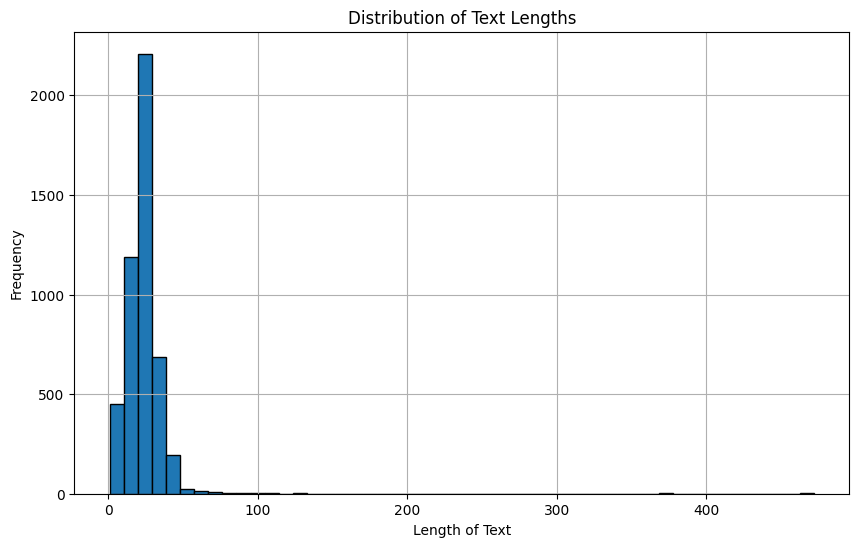

In [ ]:
words_count = train_df['content'].apply(lambda x: len(x.split()))
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(words_count, bins=50, edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
from transformers import AutoTokenizer
from datasets import load_dataset

model_checkpoint = "indolem/indobertweet-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

train_data = tokenizer(train['content'], padding='max_length', truncation=True, max_length=64, return_tensors="np")
train_data = dict(train_data)  # Because the tokenizer returns a dict subclass
train_labels = np.array(train["label"])

val_data = tokenizer(val['content'], padding='max_length', truncation=True, max_length=64, return_tensors="np")
val_data = dict(val_data)  # Because the tokenizer returns a dict subclass
val_labels = np.array(val["label"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/235k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
from transformers import TFAutoModelForSequenceClassification

with strategy.scope():
    model = TFAutoModelForSequenceClassification.from_pretrained(model_checkpoint, from_pt=True)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# The batch size will be split among TPU workers
# so we scale it up based on how many of them there are
BATCH_SIZE = 3 * strategy.num_replicas_in_sync

tf_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
tf_dataset = tf_dataset.shuffle(buffer_size=len(tf_dataset), seed=seed_value)
# You should use drop_remainder on TPU where possible, because a change in the
# batch size will require a new XLA compilation
tf_dataset = tf_dataset.batch(BATCH_SIZE, drop_remainder=True)

tf_dataset

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None)}, TensorSpec(shape=(24,), dtype=tf.int64, name=None))>

In [ ]:
# The batch size will be split among TPU workers
# so we scale it up based on how many of them there are
BATCH_SIZE = 3 * strategy.num_replicas_in_sync

tf_dataset_val = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
tf_dataset_val = tf_dataset_val.shuffle(buffer_size=len(tf_dataset_val), seed=seed_value)
# You should use drop_remainder on TPU where possible, because a change in the
# batch size will require a new XLA compilation
tf_dataset_val = tf_dataset_val.batch(BATCH_SIZE, drop_remainder=True)

tf_dataset_val

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None)}, TensorSpec(shape=(24,), dtype=tf.int64, name=None))>

In [ ]:
saved_filepath = '/content/drive/MyDrive/Satria Data pt 2/Semifinal/Model/IndoTweet_24_sentiment_anies/checkpoint-IndoTweet_24_sentiment_anies'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=saved_filepath,  # Path to save the model file
    monitor='val_sparse_categorical_accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='max',  # Mode to determine if the metric is improving (use 'min' for loss)
    save_weights_only=True,  # Save only the model weights
    verbose=1  # Verbosity mode
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_sparse_categorical_accuracy',  # Metric to monitor
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    mode='max',  # Mode to determine if the metric is improving (use 'min' for loss)
    verbose=1  # Verbosity mode
)

In [ ]:
import time

start_time_serial = time.time()
model.fit(tf_dataset, epochs=5, validation_data=tf_dataset_val, callbacks=[checkpoint_callback, early_stopping_callback])
end_time_serial = time.time()

Epoch 1/5
200/200 [==============================] - ETA: 0s - loss: 0.2247 - sparse_categorical_accuracy: 0.9242
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.94833, saving model to /content/drive/MyDrive/Satria Data pt 2/Semifinal/Model/IndoTweet_24_sentiment_anies/checkpoint-IndoTweet_24_sentiment_anies
200/200 [==============================] - 102s 146ms/step - loss: 0.2247 - sparse_categorical_accuracy: 0.9242 - val_loss: 0.1721 - val_sparse_categorical_accuracy: 0.9483
Epoch 2/5
200/200 [==============================] - ETA: 0s - loss: 0.1698 - sparse_categorical_accuracy: 0.9498
Epoch 2: val_sparse_categorical_accuracy improved from 0.94833 to 0.95000, saving model to /content/drive/MyDrive/Satria Data pt 2/Semifinal/Model/IndoTweet_24_sentiment_anies/checkpoint-IndoTweet_24_sentiment_anies
200/200 [==============================] - 23s 116ms/step - loss: 0.1698 - sparse_categorical_accuracy: 0.9498 - val_loss: 0.1683 - val_sparse_categorical_accuracy: 0.950

###### Inference

In [ ]:
from transformers import TFAutoModelForSequenceClassification

with strategy.scope():
    model = TFAutoModelForSequenceClassification.from_pretrained(model_checkpoint, from_pt=True)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

model.load_weights(saved_filepath)

loss, accuracy = model.evaluate(tf_dataset_val)
print(f'Validation loss: {loss}')
print(f'Validation accuracy: {accuracy}')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


50/50 [==============================] - 7s 15ms/step - loss: 0.1656 - sparse_categorical_accuracy: 0.9508
Validation loss: 0.16564923524856567
Validation accuracy: 0.9508333206176758


In [ ]:
term_anies = ['anies', 'muhaimin', 'paslon1']

pattern_anies = '|'.join(term_anies)

result_df_anies = result_df.loc[result_df['content'].str.contains(pattern_anies, case=False, na=False)]

In [ ]:
from datasets import Dataset

test_df = result_df_anies[['content']]

test = Dataset.from_pandas(test_df)

In [ ]:
from transformers import AutoTokenizer
from datasets import load_dataset


model_checkpoint = "indolem/indobertweet-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

test_data = tokenizer(test['content'], padding='max_length', truncation=True, max_length=64, return_tensors="np")
test_data = dict(test_data)  # Because the tokenizer returns a dict subclass

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
predictions = model.predict(test_data)
predictions

15786/15786 [==============================] - 295s 18ms/step


TFSequenceClassifierOutput(loss=None, logits=array([[-3.9483395,  4.1224422],
       [-3.493879 ,  3.765592 ],
       [-1.0279173,  1.7343981],
       ...,
       [-3.3306003,  3.6618986],
       [-3.4334922,  3.7037306],
       [-3.1312318,  3.4585083]], dtype=float32), hidden_states=None, attentions=None)

In [ ]:
import pickle

with open('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Predictons/pred_indotweet_sentiment_anies.pkl', 'wb') as f:
    pickle.dump(predictions, f)

In [ ]:
prob_pred = tf.nn.softmax(predictions.logits, axis=-1).numpy()
predicted_classes = np.argmax(prob_pred, axis=-1)
predicted_probabilities = np.max(prob_pred, axis=-1)

predicted_classes_series = pd.Series(predicted_classes)
predicted_classes_series.value_counts()

1    496521
0      8629
Name: count, dtype: int64

In [ ]:
result_df_anies['pred_sentiment'] = predicted_classes
result_df_sentiment = result_df_anies.groupby('pred_sentiment').agg(
    sentiment_count = ('appearance_count', 'sum')
)
result_df_sentiment

<ipython-input-28-f5ccfb67e423>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_anies['pred_sentiment'] = predicted_classes


,sentiment_count
pred_sentiment,
0,15013
1,4671046


##### Prabowo

###### Preprocessing Data

In [ ]:
result_df_prabowo_positif = pd.read_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/sentiment_hashtag/result_df_prabowo_positif.csv')
result_df_prabowo_negatif = pd.read_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/sentiment_hashtag/result_df_prabowo_negatif.csv')

In [ ]:
prabowo_positif = result_df_prabowo_positif.sample(4000, random_state=42)
prabowo_negatif = result_df_prabowo_negatif.sample(4000, random_state=42)
prabowo_positif['label'] = 1
prabowo_negatif['label'] = 0

df_train_prabowo = pd.concat([prabowo_positif, prabowo_negatif])
df_train_prabowo = df_train_prabowo.sample(frac=1, random_state=42).reset_index(drop=True)
df_train_prabowo.drop_duplicates(subset=['content', 'username'], inplace=True)
df_train_prabowo['label'].value_counts()

label
0    3994
1    3991
Name: count, dtype: int64

In [ ]:
df_train_prabowo_positif = df_train_prabowo.loc[df_train_prabowo['label'] == 1].sample(3000, random_state=42)
df_train_prabowo_negatif = df_train_prabowo.loc[df_train_prabowo['label'] == 0].sample(3000, random_state=42)

df_train_prabowo_balanced = pd.concat([df_train_prabowo_positif, df_train_prabowo_negatif])
df_train_prabowo_balanced = df_train_prabowo_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_train_prabowo_balanced['label'].value_counts()

label
1    3000
0    3000
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

dataset = df_train_prabowo_balanced[['content', 'label']]

train_df, val_df = train_test_split(dataset, test_size=0.2, stratify=dataset['label'], random_state=42)

In [ ]:
from datasets import Dataset

train = Dataset.from_pandas(train_df)
val = Dataset.from_pandas(val_df)

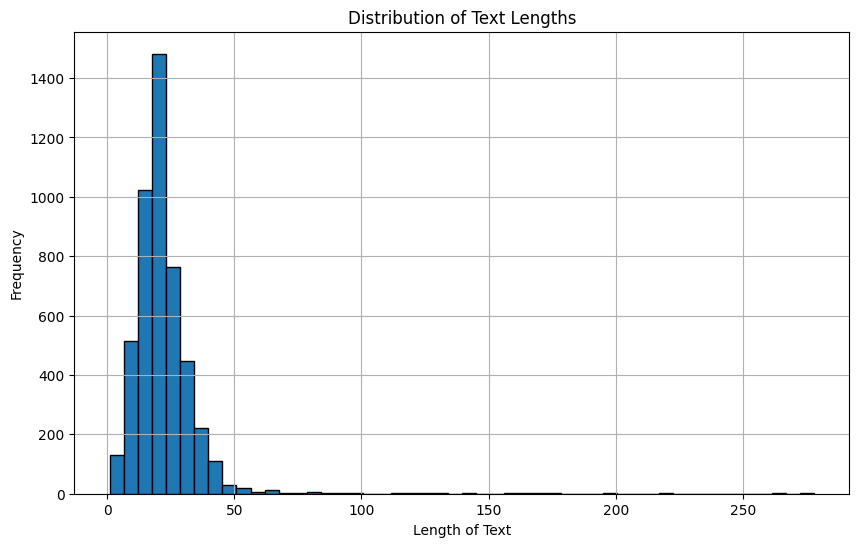

In [ ]:
words_count = train_df['content'].apply(lambda x: len(x.split()))
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(words_count, bins=50, edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
from transformers import AutoTokenizer
from datasets import load_dataset

model_checkpoint = "indolem/indobertweet-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

train_data = tokenizer(train['content'], padding='max_length', truncation=True, max_length=64, return_tensors="np")
train_data = dict(train_data)  # Because the tokenizer returns a dict subclass
train_labels = np.array(train["label"])

val_data = tokenizer(val['content'], padding='max_length', truncation=True, max_length=64, return_tensors="np")
val_data = dict(val_data)  # Because the tokenizer returns a dict subclass
val_labels = np.array(val["label"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/235k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
from transformers import TFAutoModelForSequenceClassification

with strategy.scope():
    model = TFAutoModelForSequenceClassification.from_pretrained(model_checkpoint, from_pt=True)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# The batch size will be split among TPU workers
# so we scale it up based on how many of them there are
BATCH_SIZE = 3 * strategy.num_replicas_in_sync

tf_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
tf_dataset = tf_dataset.shuffle(buffer_size=len(tf_dataset), seed=seed_value)
# You should use drop_remainder on TPU where possible, because a change in the
# batch size will require a new XLA compilation
tf_dataset = tf_dataset.batch(BATCH_SIZE, drop_remainder=True)

tf_dataset

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None)}, TensorSpec(shape=(24,), dtype=tf.int64, name=None))>

In [ ]:
# The batch size will be split among TPU workers
# so we scale it up based on how many of them there are
BATCH_SIZE = 3 * strategy.num_replicas_in_sync

tf_dataset_val = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
tf_dataset_val = tf_dataset_val.shuffle(buffer_size=len(tf_dataset_val), seed=seed_value)
# You should use drop_remainder on TPU where possible, because a change in the
# batch size will require a new XLA compilation
tf_dataset_val = tf_dataset_val.batch(BATCH_SIZE, drop_remainder=True)

tf_dataset_val

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None)}, TensorSpec(shape=(24,), dtype=tf.int64, name=None))>

In [ ]:
saved_filepath = '/content/drive/MyDrive/Satria Data pt 2/Semifinal/Model/IndoTweet_24_sentiment_prabowo/checkpoint-IndoTweet_24_sentiment_prabowo'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=saved_filepath,  # Path to save the model file
    monitor='val_sparse_categorical_accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='max',  # Mode to determine if the metric is improving (use 'min' for loss)
    save_weights_only=True,  # Save only the model weights
    verbose=1  # Verbosity mode
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_sparse_categorical_accuracy',  # Metric to monitor
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    mode='max',  # Mode to determine if the metric is improving (use 'min' for loss)
    verbose=1  # Verbosity mode
)

In [ ]:
import time

start_time_serial = time.time()
model.fit(tf_dataset, epochs=5, validation_data=tf_dataset_val, callbacks=[checkpoint_callback, early_stopping_callback])
end_time_serial = time.time()

Epoch 1/5
200/200 [==============================] - ETA: 0s - loss: 0.1506 - sparse_categorical_accuracy: 0.9454
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.97250, saving model to /content/drive/MyDrive/Satria Data pt 2/Semifinal/Model/IndoTweet_24_sentiment_prabowo/checkpoint-IndoTweet_24_sentiment_prabowo
200/200 [==============================] - 107s 148ms/step - loss: 0.1506 - sparse_categorical_accuracy: 0.9454 - val_loss: 0.0687 - val_sparse_categorical_accuracy: 0.9725
Epoch 2/5
200/200 [==============================] - ETA: 0s - loss: 0.0601 - sparse_categorical_accuracy: 0.9750
Epoch 2: val_sparse_categorical_accuracy improved from 0.97250 to 0.97333, saving model to /content/drive/MyDrive/Satria Data pt 2/Semifinal/Model/IndoTweet_24_sentiment_prabowo/checkpoint-IndoTweet_24_sentiment_prabowo
200/200 [==============================] - 24s 120ms/step - loss: 0.0601 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0613 - val_sparse_categorical_accurac

###### Inference

In [ ]:
from transformers import TFAutoModelForSequenceClassification

with strategy.scope():
    model = TFAutoModelForSequenceClassification.from_pretrained(model_checkpoint, from_pt=True)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

model.load_weights(saved_filepath)

loss, accuracy = model.evaluate(tf_dataset_val)
print(f'Validation loss: {loss}')
print(f'Validation accuracy: {accuracy}')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


50/50 [==============================] - 8s 14ms/step - loss: 0.0471 - sparse_categorical_accuracy: 0.9767
Validation loss: 0.04709412157535553
Validation accuracy: 0.9766666889190674


In [ ]:
term_prabowo = ['prabowo', 'gibran', 'paslon2']

pattern_prabowo = '|'.join(term_prabowo)

result_df_prabowo = result_df.loc[result_df['content'].str.contains(pattern_prabowo, case=False, na=False)]

In [ ]:
from datasets import Dataset

test_df = result_df_prabowo[['content']]

test = Dataset.from_pandas(test_df)

In [ ]:
from transformers import AutoTokenizer
from datasets import load_dataset


model_checkpoint = "indolem/indobertweet-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

test_data = tokenizer(test['content'], padding='max_length', truncation=True, max_length=64, return_tensors="np")
test_data = dict(test_data)  # Because the tokenizer returns a dict subclass

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
predictions = model.predict(test_data)
predictions

21277/21277 [==============================] - 390s 18ms/step


TFSequenceClassifierOutput(loss=None, logits=array([[-2.8367727 ,  3.018466  ],
       [-0.6121435 ,  0.51776004],
       [-2.3167195 ,  2.295831  ],
       ...,
       [-0.4886855 ,  0.3445019 ],
       [-0.4886855 ,  0.3445019 ],
       [-1.0902054 ,  1.0048926 ]], dtype=float32), hidden_states=None, attentions=None)

In [ ]:
import pickle

with open('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Predictons/pred_indotweet_sentiment_prabowo.pkl', 'wb') as f:
    pickle.dump(predictions, f)

In [ ]:
prob_pred = tf.nn.softmax(predictions.logits, axis=-1).numpy()
predicted_classes = np.argmax(prob_pred, axis=-1)
predicted_probabilities = np.max(prob_pred, axis=-1)

predicted_classes_series = pd.Series(predicted_classes)
predicted_classes_series.value_counts()

1    483628
0    197211
Name: count, dtype: int64

In [ ]:
result_df_prabowo['pred_sentiment'] = predicted_classes
result_df_sentiment = result_df_prabowo.groupby('pred_sentiment').agg(
    sentiment_count = ('appearance_count', 'sum')
)
result_df_sentiment

<ipython-input-28-2c7a4294ee8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_prabowo['pred_sentiment'] = predicted_classes


,sentiment_count
pred_sentiment,
0,888358
1,2381175


##### Ganjar

###### Preprocessing Data

In [ ]:
result_df_ganjar_positif = pd.read_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/sentiment_hashtag/result_df_ganjar_positif.csv')
result_df_ganjar_negatif = pd.read_csv('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Dataset/dav/sentiment_hashtag/result_df_ganjar_negatif.csv')

In [ ]:
ganjar_positif = result_df_ganjar_positif.sample(4000, random_state=42)
ganjar_negatif = result_df_ganjar_negatif.copy()
ganjar_positif['label'] = 1
ganjar_negatif['label'] = 0

df_train_ganjar = pd.concat([ganjar_positif, ganjar_negatif])
df_train_ganjar = df_train_ganjar.sample(frac=1, random_state=42).reset_index(drop=True)
df_train_ganjar.drop_duplicates(subset=['content', 'username'], inplace=True)
df_train_ganjar['label'].value_counts()

label
1    3999
0     475
Name: count, dtype: int64

In [ ]:
df_train_ganjar_positif = df_train_ganjar.loc[df_train_ganjar['label'] == 1].sample(3000, random_state=42)
df_train_ganjar_negatif = df_train_ganjar.loc[df_train_ganjar['label'] == 0]

df_train_ganjar_balanced = pd.concat([df_train_ganjar_positif, df_train_ganjar_negatif])
df_train_ganjar_balanced = df_train_ganjar_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_train_ganjar_balanced['label'].value_counts()

label
1    3000
0     475
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

dataset = df_train_ganjar_balanced[['content', 'label']]

train_df, val_df = train_test_split(dataset, test_size=0.2, stratify=dataset['label'], random_state=42)

In [ ]:
from datasets import Dataset

train = Dataset.from_pandas(train_df)
val = Dataset.from_pandas(val_df)

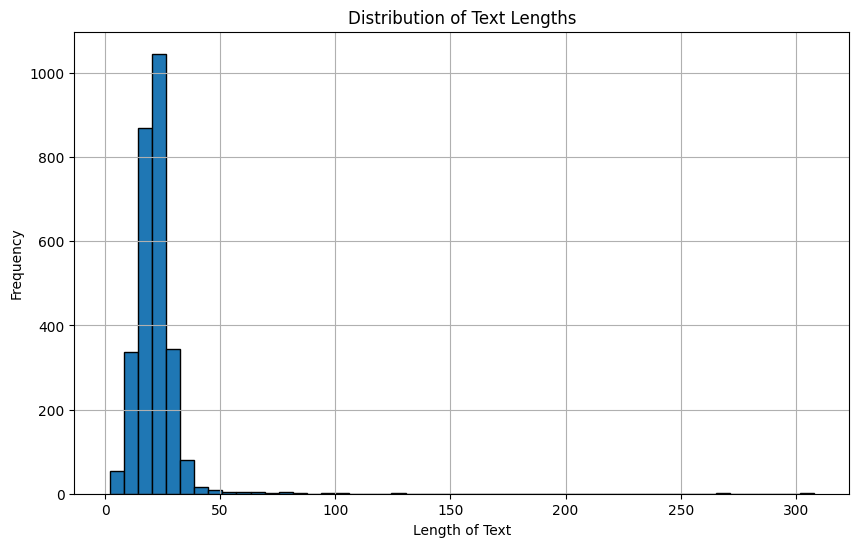

In [ ]:
words_count = train_df['content'].apply(lambda x: len(x.split()))
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(words_count, bins=50, edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
from transformers import AutoTokenizer
from datasets import load_dataset

model_checkpoint = "indolem/indobertweet-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

train_data = tokenizer(train['content'], padding='max_length', truncation=True, max_length=64, return_tensors="np")
train_data = dict(train_data)  # Because the tokenizer returns a dict subclass
train_labels = np.array(train["label"])

val_data = tokenizer(val['content'], padding='max_length', truncation=True, max_length=64, return_tensors="np")
val_data = dict(val_data)  # Because the tokenizer returns a dict subclass
val_labels = np.array(val["label"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
from transformers import TFAutoModelForSequenceClassification

with strategy.scope():
    model = TFAutoModelForSequenceClassification.from_pretrained(model_checkpoint, from_pt=True)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# The batch size will be split among TPU workers
# so we scale it up based on how many of them there are
BATCH_SIZE = 3 * strategy.num_replicas_in_sync

tf_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
tf_dataset = tf_dataset.shuffle(buffer_size=len(tf_dataset), seed=seed_value)
# You should use drop_remainder on TPU where possible, because a change in the
# batch size will require a new XLA compilation
tf_dataset = tf_dataset.batch(BATCH_SIZE, drop_remainder=True)

tf_dataset

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None)}, TensorSpec(shape=(24,), dtype=tf.int64, name=None))>

In [ ]:
# The batch size will be split among TPU workers
# so we scale it up based on how many of them there are
BATCH_SIZE = 3 * strategy.num_replicas_in_sync

tf_dataset_val = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
tf_dataset_val = tf_dataset_val.shuffle(buffer_size=len(tf_dataset_val), seed=seed_value)
# You should use drop_remainder on TPU where possible, because a change in the
# batch size will require a new XLA compilation
tf_dataset_val = tf_dataset_val.batch(BATCH_SIZE, drop_remainder=True)

tf_dataset_val

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(24, 64), dtype=tf.int64, name=None)}, TensorSpec(shape=(24,), dtype=tf.int64, name=None))>

In [ ]:
saved_filepath = '/content/drive/MyDrive/Satria Data pt 2/Semifinal/Model/IndoTweet_24_sentiment_ganjar/checkpoint-IndoTweet_24_sentiment_ganjar'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=saved_filepath,  # Path to save the model file
    monitor='val_sparse_categorical_accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='max',  # Mode to determine if the metric is improving (use 'min' for loss)
    save_weights_only=True,  # Save only the model weights
    verbose=1  # Verbosity mode
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_sparse_categorical_accuracy',  # Metric to monitor
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    mode='max',  # Mode to determine if the metric is improving (use 'min' for loss)
    verbose=1  # Verbosity mode
)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
class_weights_dict

{0: 3.6578947368421053, 1: 0.5791666666666667}

In [ ]:
import time

start_time_serial = time.time()
model.fit(tf_dataset, epochs=5, validation_data=tf_dataset_val, callbacks=[checkpoint_callback, early_stopping_callback], class_weight=class_weights_dict)
end_time_serial = time.time()

Epoch 1/5
115/115 [==============================] - ETA: 0s - loss: 0.0828 - sparse_categorical_accuracy: 0.9790
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.98958, saving model to /content/drive/MyDrive/Satria Data pt 2/Semifinal/Model/IndoTweet_24_sentiment_ganjar/checkpoint-IndoTweet_24_sentiment_ganjar
115/115 [==============================] - 98s 205ms/step - loss: 0.0828 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.0274 - val_sparse_categorical_accuracy: 0.9896
Epoch 2/5
115/115 [==============================] - ETA: 0s - loss: 0.0154 - sparse_categorical_accuracy: 0.9960
Epoch 2: val_sparse_categorical_accuracy improved from 0.98958 to 0.99851, saving model to /content/drive/MyDrive/Satria Data pt 2/Semifinal/Model/IndoTweet_24_sentiment_ganjar/checkpoint-IndoTweet_24_sentiment_ganjar
115/115 [==============================] - 19s 170ms/step - loss: 0.0154 - sparse_categorical_accuracy: 0.9960 - val_loss: 0.0082 - val_sparse_categorical_accuracy: 0.

###### Inference

In [ ]:
from transformers import TFAutoModelForSequenceClassification

with strategy.scope():
    model = TFAutoModelForSequenceClassification.from_pretrained(model_checkpoint, from_pt=True)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

model.load_weights(saved_filepath)

loss, accuracy = model.evaluate(tf_dataset_val)
print(f'Validation loss: {loss}')
print(f'Validation accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


28/28 [==============================] - 7s 15ms/step - loss: 0.0082 - sparse_categorical_accuracy: 0.9985
Validation loss: 0.008248815312981606
Validation accuracy: 0.9985119104385376


In [ ]:
term_ganjar = ['ganjar', 'mahfud', 'paslon3']

pattern_ganjar = '|'.join(term_ganjar)

result_df_ganjar = result_df.loc[result_df['content'].str.contains(pattern_ganjar, case=False, na=False)]

In [ ]:
from datasets import Dataset

test_df = result_df_ganjar[['content']]

test = Dataset.from_pandas(test_df)

In [ ]:
from transformers import AutoTokenizer
from datasets import load_dataset


model_checkpoint = "indolem/indobertweet-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

test_data = tokenizer(test['content'], padding='max_length', truncation=True, max_length=64, return_tensors="np")
test_data = dict(test_data)  # Because the tokenizer returns a dict subclass

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
predictions = model.predict(test_data)
predictions

28322/28322 [==============================] - 525s 18ms/step


TFSequenceClassifierOutput(loss=None, logits=array([[-3.9209960e+00,  3.5789630e+00],
       [ 3.2340312e-01,  2.0534294e-02],
       [ 1.7651883e-03, -1.8827918e-01],
       ...,
       [-3.3953662e+00,  2.9843926e+00],
       [-3.4963205e+00,  3.0625188e+00],
       [-3.2659507e+00,  3.0347607e+00]], dtype=float32), hidden_states=None, attentions=None)

In [ ]:
import pickle

with open('/content/drive/MyDrive/Satria Data pt 2/Semifinal/Predictons/pred_indotweet_sentiment_ganjar.pkl', 'wb') as f:
    pickle.dump(predictions, f)

In [ ]:
prob_pred = tf.nn.softmax(predictions.logits, axis=-1).numpy()
predicted_classes = np.argmax(prob_pred, axis=-1)
predicted_probabilities = np.max(prob_pred, axis=-1)

predicted_classes_series = pd.Series(predicted_classes)
predicted_classes_series.value_counts()

1    858898
0     47393
Name: count, dtype: int64

In [ ]:
result_df_ganjar['pred_sentiment'] = predicted_classes
result_df_sentiment = result_df_ganjar.groupby('pred_sentiment').agg(
    sentiment_count = ('appearance_count', 'sum')
)
result_df_sentiment

<ipython-input-34-7078df3eec56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_ganjar['pred_sentiment'] = predicted_classes


,sentiment_count
pred_sentiment,
0,94750
1,2779775
